# England Premier League Analysis

# 목차

데이터 소개

1. 토트넘 분석 
                1. 선수단 구성
                2. 문제점
                3. 보안점(이적생) : 공격수, 미드필더

2. 실제와 게임과의 상관관계

3. 게임 능력치 만들어 보기

In [229]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 119 kB/s 


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
import os
import plotly.express as px

In [3]:
# 데이터 불러오기

data = pd.read_csv('/content/Football Players Stats (Premier League 2021-2022)2.csv', encoding='latin') # latin으로 해야 nation이 잘 나옴

In [4]:
# 데이터 확인

data.head()

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,npxG.1,npxG+xA.1,%SuccPress,SuccDrib,AtmpDrib,Interception,Clearances,G-AC,Sta,PKG
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.25,0.46,NaN,NaN,NaN,NaN,NaN,71.0,76.0,61.0
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.08,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.03,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Martin ?egaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.16,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 데이터 모양 확인

data.shape

(691, 38)

In [6]:
# 데이터 정보 확인

data.info

<bound method DataFrame.info of                  Player                     Team   Nation    Pos   Age  MP  \
0           Bukayo Saka                  Arsenal  eng ENG  FW,MF  19.0  38   
1    Gabriel Dos Santos                  Arsenal   br BRA     DF  23.0  35   
2        Aaron Ramsdale                  Arsenal  eng ENG     GK  23.0  34   
3             Ben White                  Arsenal  eng ENG     DF  23.0  32   
4        Martin ?egaard                  Arsenal   no NOR     MF  22.0  36   
..                  ...                      ...      ...    ...   ...  ..   
686   Christian Marques  Wolverhampton Wanderers   ch SUI     DF  18.0   0   
687     Yerson Mosquera  Wolverhampton Wanderers   co COL     DF  20.0   0   
688       Louie Moulden  Wolverhampton Wanderers  eng ENG     GK  19.0   0   
689      Dion Sanderson  Wolverhampton Wanderers  eng ENG     DF  21.0   0   
690        James Storer  Wolverhampton Wanderers      NaN     GK   NaN   0   

     Starts    Min   90s   Gls 

In [7]:
# 널 값 확인

data.isnull().sum()

Player            0
Team              0
Nation            3
Pos               0
Age               4
MP                0
Starts            0
Min             145
90s             144
Gls             144
Ast             144
G-PK            144
PK              144
PKatt           144
CrdY            144
CrdR            144
Gls.1           145
Ast.1           145
G+A             145
G-PK2           145
G+A-PK          145
xG              145
npxG            145
xA              145
npxG+xA         145
xG.1            145
xA.1            145
xG+xA           145
npxG.1          145
npxG+xA.1       145
%SuccPress      686
SuccDrib        686
AtmpDrib        686
Interception    686
Clearances      686
G-AC            671
Sta             671
PKG             671
dtype: int64

Min이 널 값이라는 것은 출전하지 못했다는 뜻이다.
이 선수들은 필요 없는 데이터이기 때문에 삭제하겠다.

데이터가 바보 같아서 하나씩 밀려있는 데이터가 있었다.그래서 일일이 수정을 했었다.

In [8]:
data = data.dropna(subset=['Min'])

In [9]:
data.isnull().sum()

Player            0
Team              0
Nation            0
Pos               0
Age               0
MP                0
Starts            0
Min               0
90s               0
Gls               0
Ast               0
G-PK              0
PK                0
PKatt             0
CrdY              0
CrdR              0
Gls.1             0
Ast.1             0
G+A               0
G-PK2             0
G+A-PK            0
xG                0
npxG              0
xA                0
npxG+xA           0
xG.1              0
xA.1              0
xG+xA             0
npxG.1            0
npxG+xA.1         0
%SuccPress      541
SuccDrib        541
AtmpDrib        541
Interception    541
Clearances      541
G-AC            526
Sta             526
PKG             526
dtype: int64

# 1. 토트넘 분석

### 1. 선수단 구성

In [10]:
Tottenham = data[ data['Team'] == 'Tottenham Hotspur']

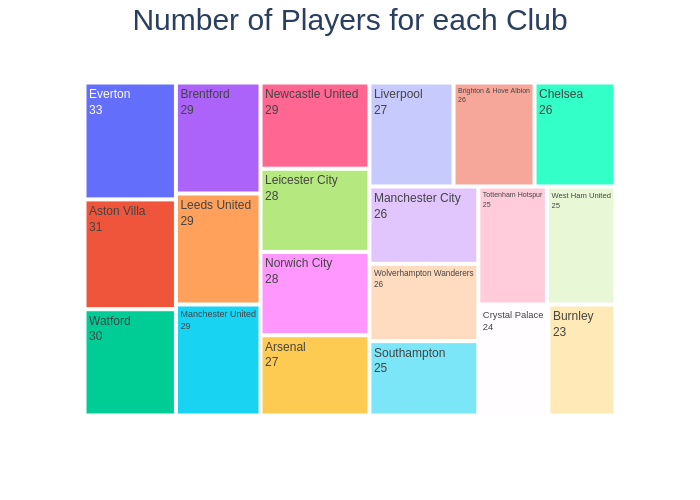

In [11]:
NumberofPlayers = data.groupby(pd.Grouper(key='Team')).size().reset_index(name='count')
fig = px.treemap(NumberofPlayers, path=['Team'], values='count')
fig.update_layout(title_text='Number of Players for each Club',
                  title_x=0.5, title_font=dict(size=30)
                  )
fig.update_traces(textinfo="label+value")
fig.show("png")

현재, EPL 사무국은 1군 선수단을 25명으로 제한하고 있다.

데이터는 겨울에 이적한 선수들을 전 소속팀과 현 소속팀 둘 다 포함하고 있다.

따라서, 에버튼은 겨울 이적을 활발히 했다는 것을 알 수 있다. 반면에, 토트넘은 아주 조용한 시즌을 보냈다.

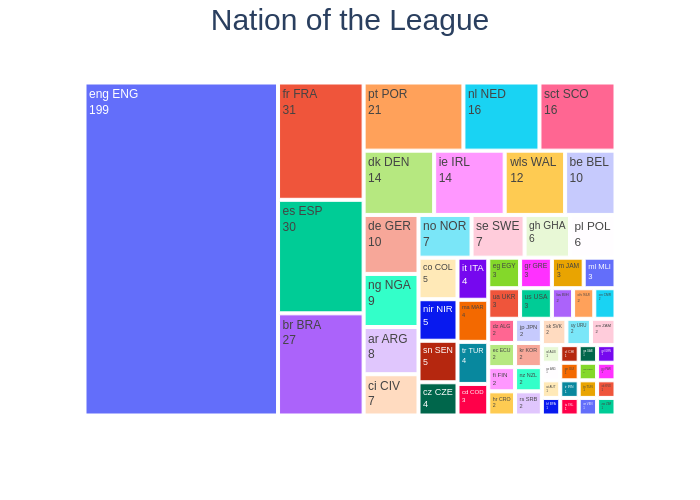

In [12]:
Nationality = data.groupby(pd.Grouper(key='Nation')).size().reset_index(name='count')
fig = px.treemap(Nationality, path=['Nation'], values='count')
fig.update_layout(title_text='Nation of the League',
                  title_x=0.5, title_font=dict(size=30)
                  )
fig.update_traces(textinfo="label+value")
fig.show("png")

영국 리그니깐 영국사람이 제일 많았다. 

그리고 전통적인 축구 강호 프랑스, 스페인, 브라질이 그 순서를 따른다. 

대한민국은 손흥민, 황희찬 단 2명. 오른쪽 밑에 조그만하게 보인다. 토트넘은 어떨까 ?

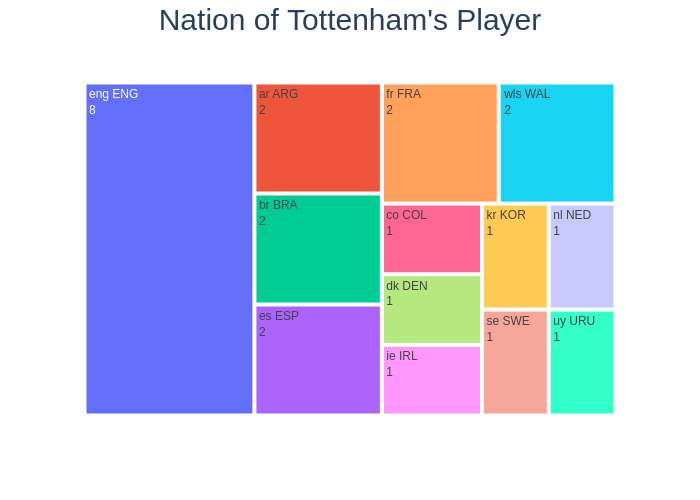

In [13]:
Nationality = Tottenham.groupby(pd.Grouper(key='Nation')).size().reset_index(name='count')
fig = px.treemap(Nationality, path=['Nation'], values='count')
fig.update_layout(title_text='Nation of Tottenham\'s Player',
                  title_x=0.5, title_font=dict(size=30)
                  )
fig.update_traces(textinfo="label+value")
fig.show("png")


EPL 사무국의 잉글랜드 자국민 육성 제도로 인해

한 팀에 잉글랜드 혹은 웨일즈에서 21세 전에 3년 간 훈련받은 선수가 최소 8명 필요하다.

즉, 영국선수가 8명 이상이 반드시 있어야 한다.

토트넘은 이를 잘 수행하고 있다는 것을 알 수 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Density Plot of the Ages')

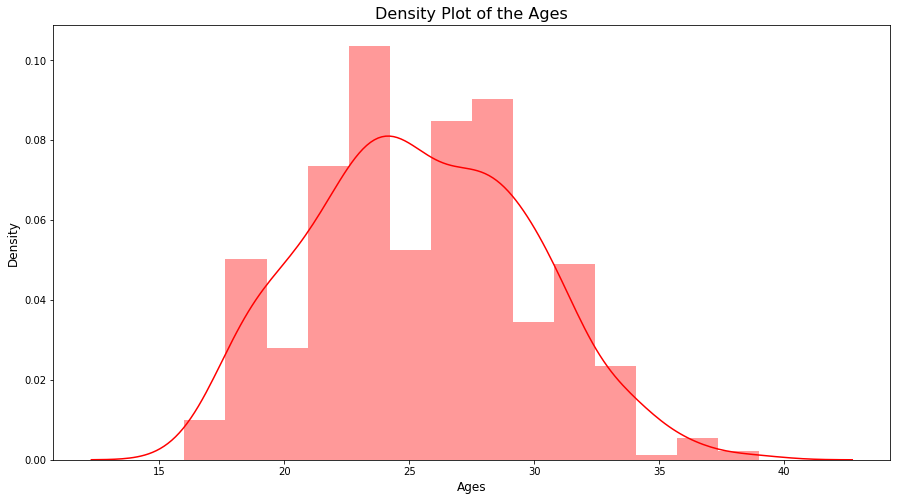

In [14]:
# 나이

plt.figure(figsize=(15, 8))
sns.distplot(data['Age'], hist=True, color='red')
plt.xlabel("Ages", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title("Density Plot of the Ages", fontsize=16)

전체적으로 20대 초반과 후반이 많이 분포해 있다는 것을 알 수 있다.

최고의 축구 무대에 비교적 나이 어린 선수들이 많다는 것이 놀랍다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Density Plot of the Ages')

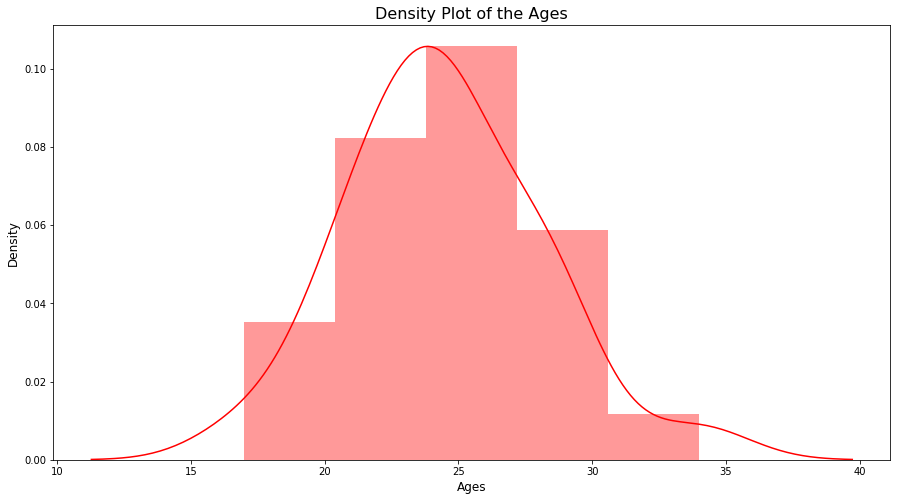

In [15]:
plt.figure(figsize=(15, 8))
sns.distplot(Tottenham['Age'], hist=True, color='red')
plt.xlabel("Ages", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title("Density Plot of the Ages", fontsize=16)

토트넘은 현재 EPL 추세와 비슷하게 젊은 선수들이 많다는 것을 알 수 있다.

### 2. 문제점

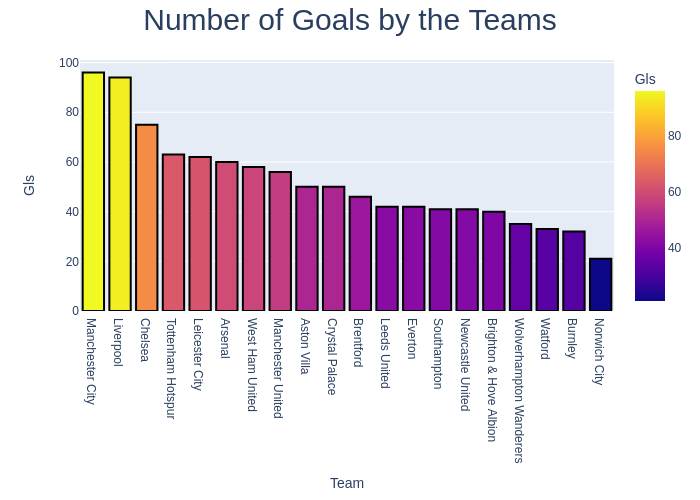

In [16]:
goalsbyteam = data['Gls'].groupby(data['Team']).sum().sort_values(ascending=False).to_frame()
fig = px.bar(data_frame=goalsbyteam, x=goalsbyteam.index, y='Gls', color='Gls')
fig.update_layout(title_text='Number of Goals by the Teams',
                  title_x=0.5, title_font=dict(size=30))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show("png")

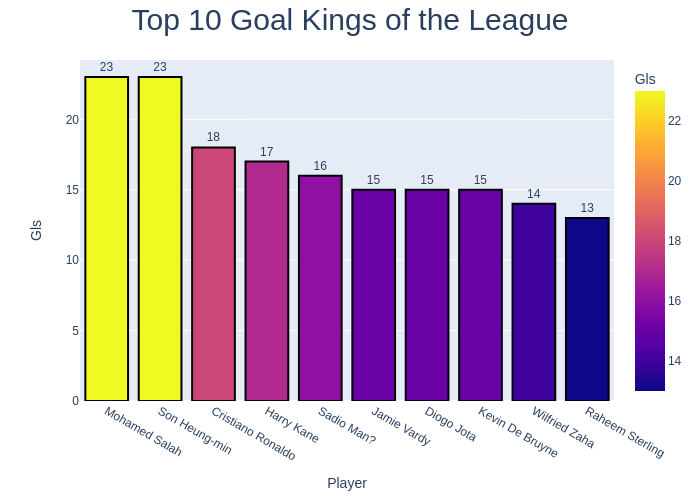

In [17]:
# 득점왕

fig_bar = px.bar(data_frame=data.nlargest(10, 'Gls')[['Player', 'Gls']],
x='Player', y='Gls', color='Gls', text='Gls')
fig_bar.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig_bar.update_layout(title_text='Top 10 Goal Kings of the League', 
title_x=0.5, title_font=dict(size=30)) 
fig_bar.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_bar.show("png")

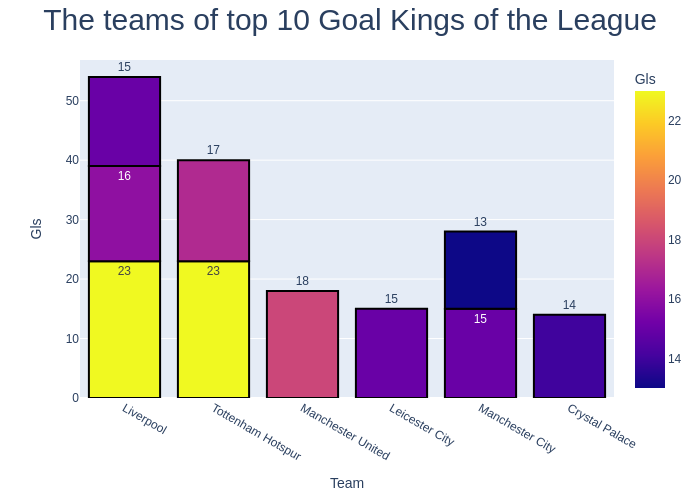

In [18]:
fig_bar = px.bar(data_frame=data.nlargest(10, 'Gls')[['Team', 'Gls']],
x='Team', y='Gls', color='Gls', text='Gls')
fig_bar.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig_bar.update_layout(title_text='The teams of top 10 Goal Kings of the League', 
title_x=0.5, title_font=dict(size=30)) 
fig_bar.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_bar.show("png")

팀 득점 1위였던, 맨체스터 시티(Manchester City)는 케빈 데 브라이너(Kevin De Bruyne)와 라힘 스털링(Raheem Sterling) 단 두명 만이 득점왕 10위에 랭크했다.

그들이 넣은 골 수는 28골 뿐이다. 나머지 68골은 다른 선수들이 득점했다는 것이다. 

반면에, 토트넘은 두 선수가 40골을 넣었다. 나머지 선수들은 고작 23득점만 했을 뿐이다.

팀원들이 더 골을 넣어준다면, 다음 시즌은 더욱 높은 성적을 기록할 수 있을 거라 생각된다.

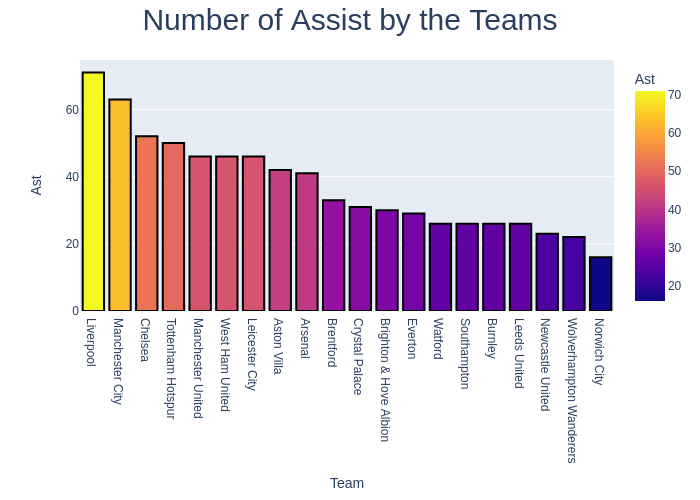

In [19]:
assistsbyteam = data['Ast'].groupby(data['Team']).sum().sort_values(ascending=False).to_frame()
fig = px.bar(data_frame=assistsbyteam, x=assistsbyteam.index, y='Ast', color='Ast')
fig.update_layout(title_text='Number of Assist by the Teams',
                  title_x=0.5, title_font=dict(size=30))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show("png")

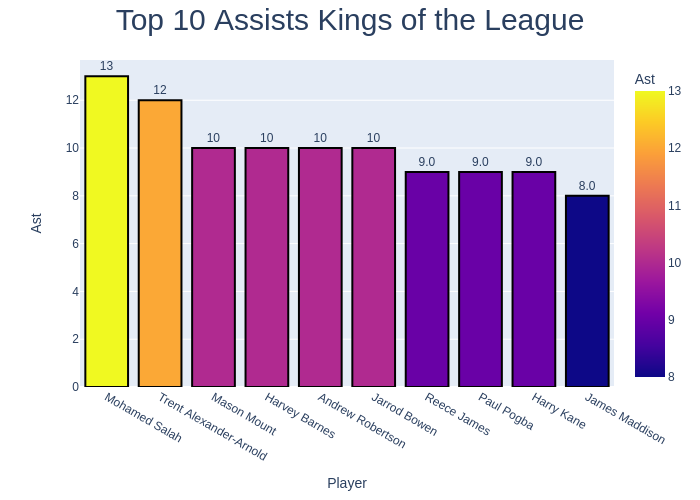

In [20]:
# 도움왕

fig_bar = px.bar(data_frame=data.nlargest(10, 'Ast')[['Player', 'Ast']],
                 x='Player', y='Ast', color='Ast', text='Ast')
fig_bar.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig_bar.update_layout(title_text='Top 10 Assists Kings of the League', 
                      title_x=0.5, title_font=dict(size=30)) 
fig_bar.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_bar.show("png")

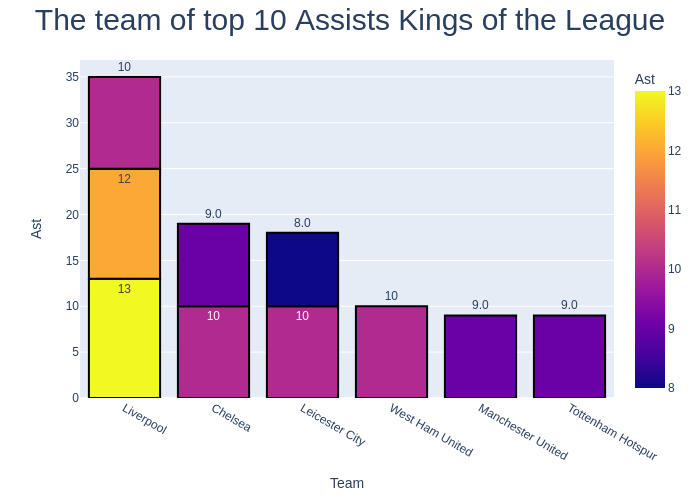

In [21]:
fig_bar = px.bar(data_frame=data.nlargest(10, 'Ast')[['Team', 'Ast']],
x='Team', y='Ast', color='Ast', text='Ast')
fig_bar.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig_bar.update_layout(title_text='The team of top 10 Assists Kings of the League', 
title_x=0.5, title_font=dict(size=30)) 
fig_bar.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_bar.show("png")

어시스트 1위 팀인 리버풀(Liverpool) 선수인 모하메드 살라(Mohamed Salah), 트렌트 알렉산더 아놀드(Trent Alexander-Arnold)와 앤드류 로버트슨(Andrew Robertson)이 도움왕 1등, 2등, 3등을 나란히 헀다. 그들의 팀은 최종 순위에 2등을 했다. 

도움을 많이 하는 것은 팀 순위에 영향을 끼친다라고 결론을 내릴 수 있다.

하지만 토트넘 선수는 한명만 이름을 올리고 있다. 도움을 올려줄 선수가 필요하다.

그렇다면, 토트넘은 올해 이적 시장을 잘 보내고 있는가 ?

### 3. 보완점 (이적생)


다른 리그에서 이적해 온 선수들은 데이터에 없어 비교를 하지 못한다.

그래서 자국 내에서 이적한 선수들만 비교할 것이다.

ps) 미드필드 지표도 데이터에 없어서, 필요한 선수들만 데이터를 추가했다.

In [22]:
# 레이다 그래프 만들기

def Playwell(trace1):
    x = data[data["Player"] == trace1]
    trace1 = go.Scatterpolar(
      r = [x['Ast'].values[0], x["xA"].values[0], x['Gls'].values[0], x['xG'].values[0], x['G-PK'].values[0], x['MP'].values[0]],
      theta = ['Assists', "Expected Assists", 'Goals','Expected Goals','Filed_Goals','Matches played'],
      fill = 'toself',
      name = trace1
    )
    return trace1

def PlayerSpotlight(trace1):
    trace1 = Playwell(trace1)
    layout = go.Layout(
          xaxis=dict(
            domain=[0, 0.45]
            ),
            yaxis=dict(
            domain=[0, 0.45]
            ),
        
           
          showlegend = True,
          title = "Player Performance"
    )

    data = [trace1]
    fig = go.Figure(data=data, layout=layout)

    fig.show("png")

# 선수들 관의 데이터 비교 레이더 그래프

def PlayerFight(trace1,trace2,trace3,trace4):
  trace1 = Playwell(trace1) 
  trace2 = Playwell(trace2)
  trace3 = Playwell(trace3)
  trace4 = Playwell(trace4)
  layout = go.Layout(
    xaxis=dict(
          domain=[0, 0.50]
      ),
      yaxis=dict(
           domain=[0, 0.50]
      ),
      xaxis2=dict(
          domain=[0.70, 1]
      ),
       xaxis3=dict(
          domain=[0, 0.50],
          anchor='y3'
      ),
      xaxis4=dict(
          domain=[0.70, 1],
           anchor='y4'
      ),
       yaxis2=dict(
          domain=[0, 0.50],
          anchor='x2'
      ),
       yaxis3=dict(
          domain=[0.70, 1]
      ),
      yaxis4=dict(
          domain=[0.70, 1],
          anchor='x4'
      ),
    showlegend = True,
     title = "Player Fight (who will you bet on!)"
  )

  data = [trace1, trace2, trace3, trace4]
  fig = go.Figure(data=data, layout=layout)

  fig.show("png")

어시스트(Ast), 어시스트 기댓값(xA), 골 수(Gls), 골 넣을 기댓값(xG), 필드골(G-PK), 경기에 뛴 시간(Mp)를 기준으로 비교하겠다.

공격수를 평가하는데, 왜 MP를 넣는 지 의아하다고 생각하는 사람이 있을 수도 있다.

토트넘은 옛날부터, 부상 병동이라고 불릴 만큼 부상자가 많았다. 그래서, MP 시간이 보장이 중요하다

#### 1. 공격수 비교

이번 여름 시장에서 에버튼 공격수인 히샬리송(Richarlison) 을 영입했다.

공격 포인트가 절실한 토트넘에 도움을 줄 수 있는 지 확인해보자.

다음은 득점왕 경쟁을 하던 5위 선수들과 영입생을 비교한 그래프다,

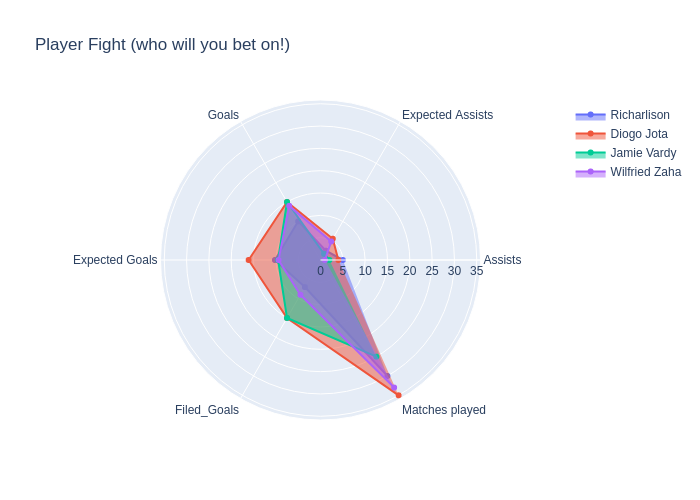

In [23]:
# 득점왕 5등들과 영입생 비교

PlayerFight("Richarlison", 'Diogo Jota', 'Jamie Vardy', 'Wilfried Zaha')

디오구 조타(Diogo Jota)를 제외한 득점왕을 경쟁했던 공격수들과 비교했을 때, 밀리지 않는 수치를 보여준다.

따라서, 히샬리송(Richarlison)은 아주 좋은 영입이라고 볼 수 있다.

#### 2. 미드필더 비교

이번 여름 시장에서 브라이턴에서 수비형 미드필더인 이브 비수마(Yves Bissouma)를 영입했다.

그가 토트넘에서 무엇을 보완해줄 수 있을 지 확인해보자.

수비형 미드필더는 수비 능력과 공을 운반하는 능력이 중요하다,

그래서 드리블 성공률(SuccDrib), 
수비 능력인 공 가로채기(Interception), 압박 성공률(%SuccPress), 공을 운반하는 능력인 드리블 성공률(SuccDrib)을 데이터에 추가했다.

In [24]:
Tottenham = data[(data['Team'] == 'Tottenham Hotspur') | (data['Player'] == 'Yves Bissouma')]

In [25]:
# 토트넘 미드필더만 남기기

Tottenham_mid = Tottenham.dropna(subset=['SuccDrib'])

In [26]:
# 드리브 성공률 계산

Tottenham_mid['%Drib'] = Tottenham_mid['SuccDrib']/Tottenham_mid['AtmpDrib']

In [27]:
# 미드필더 능력 지표

def Playwell(trace1):
    x = data[data["Player"] == trace1]
    trace1 = go.Scatterpolar(
      r = [x['Ast'].values[0], x["xA"].values[0], x['%SuccPress'].values[0], x['Interception'].values[0], x['Clearances'].values[0]],
      theta = ['Assists', "Expected Assists", '%SuccPress','Interception', 'Clearances'],
      fill = 'toself',
      name = trace1
    )
    return trace1

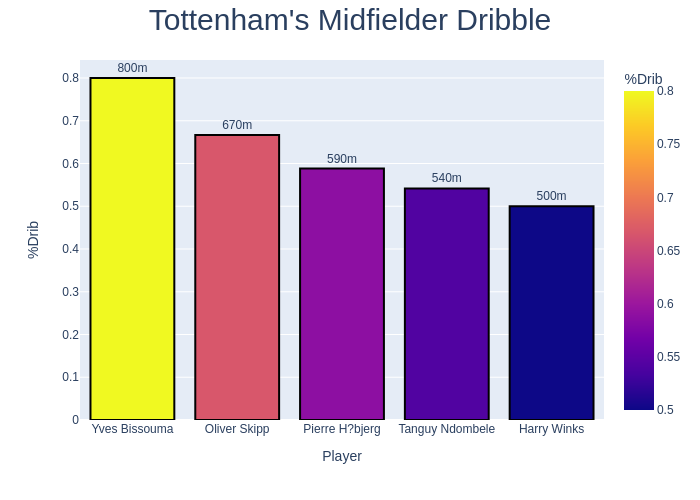

In [28]:
# 드리블 비교

fig_bar = px.bar(data_frame=Tottenham_mid.nlargest(5, '%Drib')[['Player', '%Drib']],
                 x='Player', y='%Drib', color='%Drib', text='%Drib')
fig_bar.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig_bar.update_layout(title_text='Tottenham\'s Midfielder Dribble',  # Main title for the project
                      title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig_bar.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_bar.show("png")

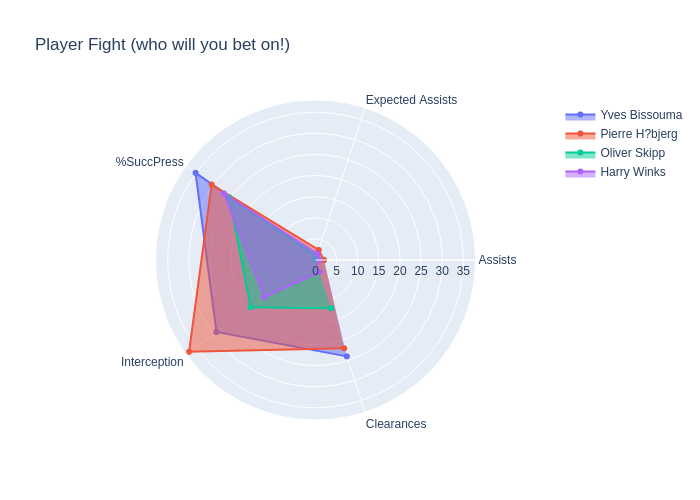

In [29]:
# 토트넘 미드필더와 영입생 비교

PlayerFight("Yves Bissouma", 'Pierre H?bjerg', 'Oliver Skipp', 'Harry Winks')

비수마는 Interception 제외하고는 토트넘 미드필더 에이스인 호이비에르(Pierre H?bjerg) 보다  모든 수치에서 높은 것을 볼 수 있다.

이로써, 비수마는 좋은 영입이라고 판단된다.

두 선수를 봤을 때, 현재까지는 이적 시장을 잘 보내고 있다고 평가할만 하다.

하지만,
앞서 어시스트 중요성을 말한 만큼, 좋은 패스를 해줄 수 있는 미드필더도 속히 영입되기를 바란다.

# 2. 실제와 게임과의 상관관계

아쉽게도 데이터 셋이 공격 포인트 위주로만 있다. 따라서, 득점 랭킹 20위까지만을 가지고 게임 데이터로 비교해 보겠다.

피파온라인4 게임 데이터인 골 결정력(G-AC), 스테미너(Sta), 패널트킥(PKG)를 column에 추가했다.

In [30]:
# 20위까지 추출

data.sort_values(by='Gls', ascending=False).head(20)

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,npxG.1,npxG+xA.1,%SuccPress,SuccDrib,AtmpDrib,Interception,Clearances,G-AC,Sta,PKG
356,Mohamed Salah,Liverpool,eg EGY,FW,29.0,35,30,"2,762",30.7,23.0,...,0.55,0.89,NaN,NaN,NaN,NaN,NaN,85.0,80.0,79.0
556,Son Heung-min,Tottenham Hotspur,kr KOR,"FW,MF",29.0,35,35,"3,006",33.4,23.0,...,0.49,0.73,NaN,NaN,NaN,NaN,NaN,86.0,86.0,72.0
423,Cristiano Ronaldo,Manchester United,pt POR,FW,36.0,30,27,"2,456",27.3,18.0,...,0.52,0.64,NaN,NaN,NaN,NaN,NaN,86.0,71.0,83.0
553,Harry Kane,Tottenham Hotspur,eng ENG,FW,28.0,37,36,"3,232",35.9,17.0,...,0.48,0.73,NaN,NaN,NaN,NaN,NaN,91.0,80.0,89.0
354,Sadio Man?,Liverpool,sn SEN,FW,29.0,34,32,"2,819",31.3,16.0,...,0.53,0.67,NaN,NaN,NaN,NaN,NaN,80.0,79.0,70.0
392,Kevin De Bruyne,Manchester City,be BEL,MF,30.0,30,25,"2,201",24.5,15.0,...,0.26,0.65,NaN,NaN,NaN,NaN,NaN,78.0,84.0,79.0
359,Diogo Jota,Liverpool,pt POR,FW,24.0,35,27,"2,364",26.3,15.0,...,0.61,0.82,NaN,NaN,NaN,NaN,NaN,79.0,77.0,64.0
328,Jamie Vardy,Leicester City,eng ENG,FW,34.0,25,20,"1,806",20.1,15.0,...,0.47,0.55,NaN,NaN,NaN,NaN,NaN,85.0,73.0,81.0
220,Wilfried Zaha,Crystal Palace,ci CIV,FW,28.0,33,31,"2,760",30.7,14.0,...,0.13,0.29,NaN,NaN,NaN,NaN,NaN,73.0,71.0,71.0
394,Raheem Sterling,Manchester City,eng ENG,FW,26.0,30,23,"2,128",23.6,13.0,...,0.51,0.70,NaN,NaN,NaN,NaN,NaN,77.0,75.0,67.0


In [31]:
score_20 = data[ data['Gls'] >= 11]
score_20_origin = data[ data['Gls'] >= 11]

In [32]:
score_20

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,npxG.1,npxG+xA.1,%SuccPress,SuccDrib,AtmpDrib,Interception,Clearances,G-AC,Sta,PKG
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.25,0.46,NaN,NaN,NaN,NaN,NaN,71.0,76.0,61.0
45,Ollie Watkins,Aston Villa,eng ENG,FW,25.0,35,33,"2,952",32.8,11.0,...,0.35,0.44,NaN,NaN,NaN,NaN,NaN,77.0,84.0,62.0
86,Ivan Toney,Brentford,eng ENG,FW,25.0,33,32,"2,909",32.3,12.0,...,0.25,0.43,NaN,NaN,NaN,NaN,NaN,75.0,74.0,77.0
188,Mason Mount,Chelsea,eng ENG,"MF,FW",22.0,32,27,"2,363",26.3,11.0,...,0.31,0.56,NaN,NaN,NaN,NaN,NaN,75.0,81.0,63.0
220,Wilfried Zaha,Crystal Palace,ci CIV,FW,28.0,33,31,"2,760",30.7,14.0,...,0.13,0.29,NaN,NaN,NaN,NaN,NaN,73.0,71.0,71.0
288,Raphael Dias Belloli,Leeds United,br BRA,"FW,MF",24.0,35,34,"2,915",32.4,11.0,...,0.25,0.46,NaN,NaN,NaN,NaN,NaN,70.0,78.0,67.0
322,James Maddison,Leicester City,eng ENG,"MF,FW",24.0,35,28,"2,459",27.3,12.0,...,0.30,0.48,NaN,NaN,NaN,NaN,NaN,75.0,74.0,74.0
328,Jamie Vardy,Leicester City,eng ENG,FW,34.0,25,20,"1,806",20.1,15.0,...,0.47,0.55,NaN,NaN,NaN,NaN,NaN,85.0,73.0,81.0
354,Sadio Man?,Liverpool,sn SEN,FW,29.0,34,32,"2,819",31.3,16.0,...,0.53,0.67,NaN,NaN,NaN,NaN,NaN,80.0,79.0,70.0
356,Mohamed Salah,Liverpool,eg EGY,FW,29.0,35,30,"2,762",30.7,23.0,...,0.55,0.89,NaN,NaN,NaN,NaN,NaN,85.0,80.0,79.0


In [33]:
# pk 정확성을 위한 계산

score_20['%pk']= score_20['PK'] / score_20['PKatt']

왜 ? 많은 패널트킥 기회를 얻은 사람이 패널트킥 득점을 많이 했을 확률이 높다.

보다 정확하게, 패널트킥 능력을 보려고 한다면, 패널트킥 성공률을 보는 것이 정확하다.

하지만, 패널트킥을 단 한 번도, 차지 않는 선수들이 있다. 이 선수들의 널값을 0으로 처리해주겠다.

In [34]:
# 널 값을 0으로 바꿔서 값을 쓸 수 있게 만든다

score_20['%pk'] = score_20['%pk'].fillna(value=0)

In [35]:
score_20

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,npxG+xA.1,%SuccPress,SuccDrib,AtmpDrib,Interception,Clearances,G-AC,Sta,PKG,%pk
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.46,NaN,NaN,NaN,NaN,NaN,71.0,76.0,61.0,1.000000
45,Ollie Watkins,Aston Villa,eng ENG,FW,25.0,35,33,"2,952",32.8,11.0,...,0.44,NaN,NaN,NaN,NaN,NaN,77.0,84.0,62.0,1.000000
86,Ivan Toney,Brentford,eng ENG,FW,25.0,33,32,"2,909",32.3,12.0,...,0.43,NaN,NaN,NaN,NaN,NaN,75.0,74.0,77.0,1.000000
188,Mason Mount,Chelsea,eng ENG,"MF,FW",22.0,32,27,"2,363",26.3,11.0,...,0.56,NaN,NaN,NaN,NaN,NaN,75.0,81.0,63.0,1.000000
220,Wilfried Zaha,Crystal Palace,ci CIV,FW,28.0,33,31,"2,760",30.7,14.0,...,0.29,NaN,NaN,NaN,NaN,NaN,73.0,71.0,71.0,0.714286
288,Raphael Dias Belloli,Leeds United,br BRA,"FW,MF",24.0,35,34,"2,915",32.4,11.0,...,0.46,NaN,NaN,NaN,NaN,NaN,70.0,78.0,67.0,1.000000
322,James Maddison,Leicester City,eng ENG,"MF,FW",24.0,35,28,"2,459",27.3,12.0,...,0.48,NaN,NaN,NaN,NaN,NaN,75.0,74.0,74.0,0.000000
328,Jamie Vardy,Leicester City,eng ENG,FW,34.0,25,20,"1,806",20.1,15.0,...,0.55,NaN,NaN,NaN,NaN,NaN,85.0,73.0,81.0,0.000000
354,Sadio Man?,Liverpool,sn SEN,FW,29.0,34,32,"2,819",31.3,16.0,...,0.67,NaN,NaN,NaN,NaN,NaN,80.0,79.0,70.0,0.000000
356,Mohamed Salah,Liverpool,eg EGY,FW,29.0,35,30,"2,762",30.7,23.0,...,0.89,NaN,NaN,NaN,NaN,NaN,85.0,80.0,79.0,0.833333


과연, 실제와 게임상의 상관관계가 있을까?

G-PK : 패널트킥을 제외한 필드 골

90s : 전체 출전 시간을 90분으로 나눈 값

%pk : 패널트킥을 넣을 확률

G-AC : 게임 속 골 결정력

Sta : 게임 속 스테미너(체력)

PKG : 게임 속 패널트킥 능력

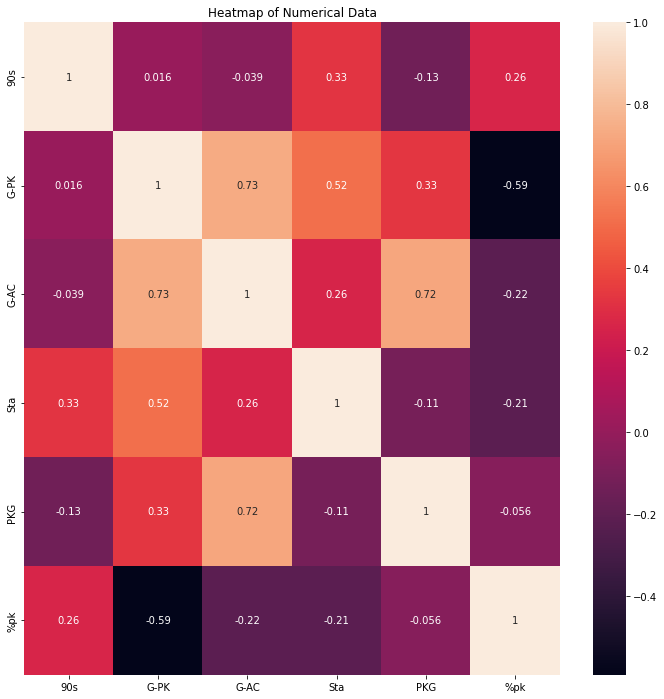

In [36]:
corrMat = score_20[['90s', 'G-PK', 'G-AC', 'Sta', 'PKG', '%pk']].corr() 
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.heatmap(corrMat, annot=True)    # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

G-PK와 G-AC와 연관이 있어 보인다. -> 0.73

90s와 스테미너가 연관 있다. -> 0.33

%pk는 안 찬 사람이 있어, PKG와 음의 관계가 띈다고 판단된다. - > -0.056

결론, 약간 씩의 상관관계가 있어 보이지만, 영향력이 거의 없다고 판단된다.

# 3. 게임 능력치 만들어 보기

G-PK를 게임상의 골 결정력으로, 90s를 게임상의 스테미너로, Pk를 게임상의 패널트킥 능력으로 계산하여 만들어 보겠다.

우선 실제로 pk를 안 찬 사람들을 게임상 패널트킥 평균 값으로 대체하겠다.

In [37]:
score_20 = score_20[['Player','G-PK', 'G-AC','90s','Sta','%pk','PKG']]
score_20_orgin = score_20_origin[['Player','G-AC','Sta','PKG']]

In [38]:
# pk 안찬 사람들의 게임상의 패널트킥 능력 값

score_20[score_20["%pk"] ==0].describe()

,G-PK,G-AC,90s,Sta,%pk,PKG
count,7.000000,7.000000,7.00000,7.000000,7.0,7.000000
mean,15.428571,80.142857,28.00000,78.571429,0.0,72.571429
std,3.690399,3.976119,4.90068,4.859943,0.0,5.996030
min,12.000000,75.000000,20.10000,73.000000,0.0,64.000000
25%,13.500000,78.000000,25.40000,75.500000,0.0,69.000000
50%,15.000000,79.000000,27.30000,77.000000,0.0,72.000000
75%,15.500000,82.500000,32.20000,81.500000,0.0,76.500000
max,23.000000,86.000000,33.40000,86.000000,0.0,81.000000


In [39]:
# 패널트킥 능력 72로 주기

score_20.loc[score_20['%pk']==0,'PKG']=72

In [40]:
# 실제 능력과 게임 지표 평균과 분포 나타내보기

score_20.describe()

,G-PK,G-AC,90s,Sta,%pk,PKG
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,12.210526,78.473684,29.147368,76.842105,0.579699,71.789474
std,4.263266,5.719056,5.277243,4.879244,0.465720,6.932844
min,7.000000,70.000000,16.600000,69.000000,0.000000,61.000000
25%,9.000000,75.000000,26.300000,73.500000,0.000000,67.000000
50%,12.000000,77.000000,30.700000,77.000000,0.800000,72.000000
75%,15.000000,82.500000,32.950000,80.000000,1.000000,73.000000
max,23.000000,91.000000,36.100000,86.000000,1.000000,89.000000


In [41]:
# 패널트킥 능력치 배분

score_20.loc[score_20['%pk']<=0.5,'PKG']=80
score_20.loc[(score_20['%pk']> 0.5) & (score_20['%pk'] <= 0.7 ),'PKG']=83
score_20.loc[(score_20['%pk']> 0.7) & (score_20['%pk'] <= 0.8 ),'PKG']=85
score_20.loc[score_20['%pk']==1.0,'PKG']=89

패널트킥 한 번도 안 찬 사람들에게 72 능력치를 주었다. 비교적, 패널트킥을 한 번이라도 성공시킨 사람들은 이들 보다 큰 차이가 있어야 된다고 생각했다.

따라서, 제일 낮은 수를 +8로 능력을 줬다.

In [42]:
# 골 결정력 배분

score_20.loc[score_20['G-PK']==7,'G-AC']=70
score_20.loc[(score_20['G-PK']> 7) & (score_20['G-PK'] <= 9 ),'G-AC']=75
score_20.loc[(score_20['G-PK']> 9) & (score_20['G-PK'] <= 11 ),'G-AC']=77
score_20.loc[(score_20['G-PK']> 11) & (score_20['G-PK'] <= 12 ),'G-AC']=80
score_20.loc[(score_20['G-PK']> 12) & (score_20['G-PK'] <= 15 ),'G-AC']=82
score_20.loc[(score_20['G-PK']> 15) & (score_20['G-PK'] <= 20 ),'G-AC']=84
score_20.loc[(score_20['G-PK']> 20) & (score_20['G-PK'] <= 21 ),'G-AC']=86
score_20.loc[(score_20['G-PK']> 21) & (score_20['G-PK'] <= 22 ),'G-AC']=88
score_20.loc[score_20['G-PK']>=23,'G-AC']=90

In [43]:
# 스테미너 배분

score_20.loc[score_20['90s']<20.1,'Sta']=66
score_20.loc[score_20['90s']==20.1,'Sta']=68
score_20.loc[(score_20['90s']> 20.1) & (score_20['90s'] <= 25 ),'Sta']=75
score_20.loc[(score_20['90s']> 25) & (score_20['90s'] <= 27 ),'Sta']=81
score_20.loc[(score_20['90s']> 27.) & (score_20['90s'] <= 33 ),'Sta']=82
score_20.loc[(score_20['90s']> 33) & (score_20['90s'] <= 36 ),'Sta']=83
score_20.loc[score_20['90s']>36,'Sta']=86
score_20

,Player,G-PK,G-AC,90s,Sta,%pk,PKG
0,Bukayo Saka,9.0,75.0,33.1,83.0,1.000000,89.0
45,Ollie Watkins,10.0,77.0,32.8,82.0,1.000000,89.0
86,Ivan Toney,7.0,70.0,32.3,82.0,1.000000,89.0
188,Mason Mount,10.0,77.0,26.3,81.0,1.000000,89.0
220,Wilfried Zaha,9.0,75.0,30.7,82.0,0.714286,85.0
288,Raphael Dias Belloli,7.0,70.0,32.4,82.0,1.000000,89.0
322,James Maddison,12.0,80.0,27.3,82.0,0.000000,80.0
328,Jamie Vardy,15.0,82.0,20.1,68.0,0.000000,80.0
354,Sadio Man?,16.0,84.0,31.3,82.0,0.000000,80.0
356,Mohamed Salah,18.0,84.0,30.7,82.0,0.833333,79.0


In [45]:
def Playwell_orgin(trace1):
    x = score_20_orgin[score_20_orgin["Player"] == trace1]
    trace1 = go.Scatterpolar(
      r = [x['G-AC'].values[0], x["Sta"].values[0], x['PKG'].values[0]],
      theta = ['G-AC', "Sta", 'PKG'],
      fill = 'toself',
      name = trace1
    )
    return trace1

def Playwell(trace2):
    x = score_20[score_20["Player"] == trace2]
    trace2 = go.Scatterpolar(
      r = [x['G-AC'].values[0], x["Sta"].values[0], x['PKG'].values[0]],
      theta = ['G-AC', "Sta", 'PKG'],
      fill = 'toself',
      name = trace2
    )
    return trace2
  
def Player_analysis(trace1,trace2):
  trace1 = Playwell_orgin(trace1) 
  trace2 = Playwell(trace2)
  layout = go.Layout(
    xaxis=dict(
          domain=[0, 0.50]
      ),
      yaxis=dict(
           domain=[0, 0.50]
      ),
      xaxis2=dict(
          domain=[0.70, 1]
      ),
       xaxis3=dict(
          domain=[0, 0.50],
          anchor='y3'
      ),
       yaxis2=dict(
          domain=[0, 0.50],
          anchor='x2'
      ),
       yaxis3=dict(
          domain=[0.70, 1]
      ),
    showlegend = True,
     title = "Player"
  )

  data = [trace1, trace2]
  fig = go.Figure(data=data, layout=layout)

  fig.show("png")

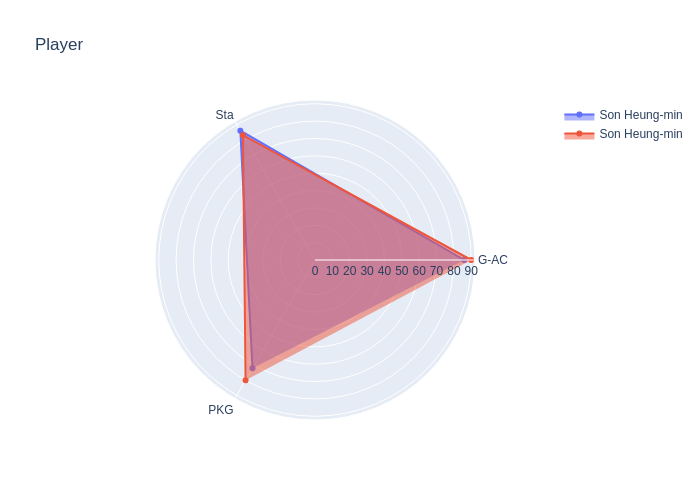

In [46]:
Player_analysis("Son Heung-min", "Son Heung-min")

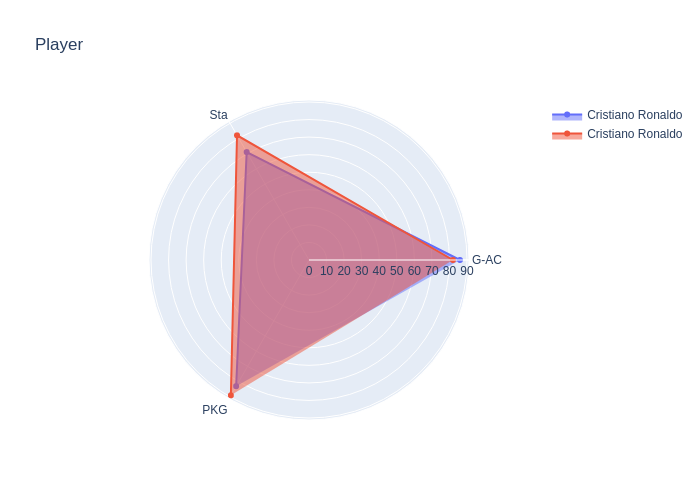

In [47]:
Player_analysis("Cristiano Ronaldo", "Cristiano Ronaldo")

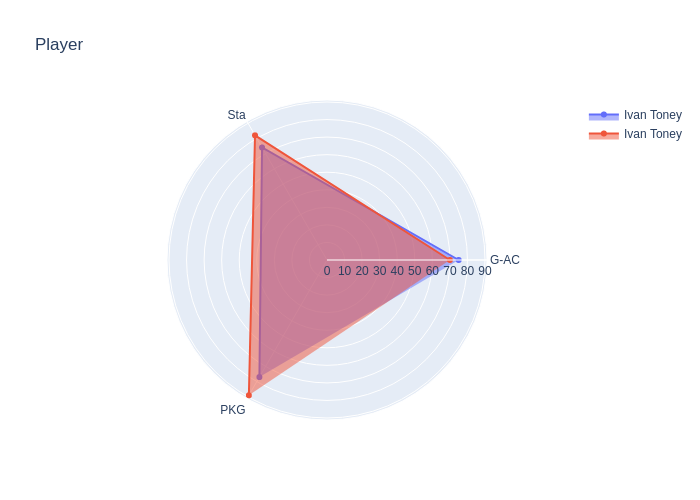

In [48]:
Player_analysis("Ivan Toney", "Ivan Toney")

값을 수정했지만, 큰 차이는 없어 보인다. 그렇다면 상관관계는 어떨까?

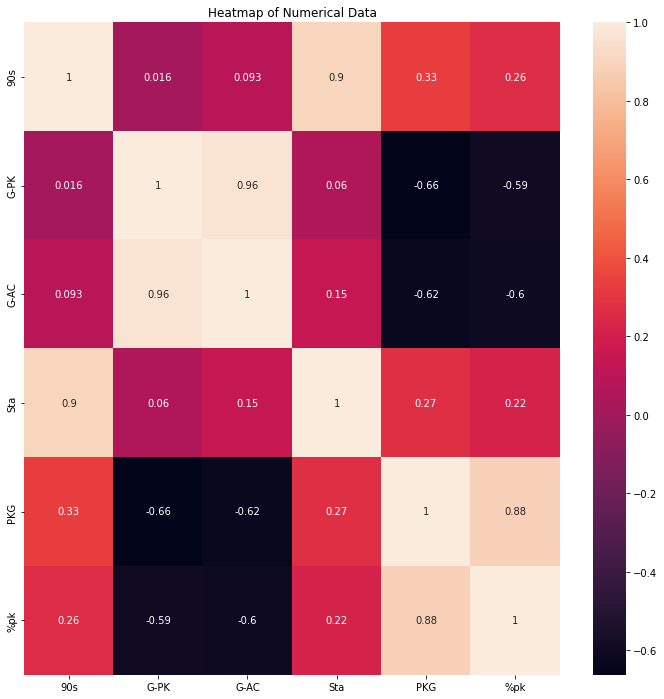

In [49]:
# 상관관계 히트맵 그리기

corrMat = score_20[['90s', 'G-PK', 'G-AC', 'Sta', 'PKG', '%pk']].corr() 
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.heatmap(corrMat, annot=True)    
ax.set(title='Heatmap of Numerical Data');

G-PK와 G-AC는 0.96%로 수치가 향상 되었다.

90s와 Sta는 0.9%까지 향상되었다.

%pk와 PKG는 0.88%까지 연관있다고 말해준다.

#결론

현실 데이터 수치가 높으면, 게임 데이터 수치도 높아야 한다. 우리는 이를 구현하기 위해, 데이터 전처리를 진행했다. 이에 따라, 낮았던 상관관계가 높아지고, 음의 상관관계는 양의 상관관계로 변형 되었다. 

결론적으로 현실 데이터를 게임 속 데이터로 잘 구현했다고 판단된다.